Name: Saleh Abdallah

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Data Collection

In [114]:
# Historical Sstocks dataset
df_info = pd.read_csv('historical_stocks.csv')
df_info.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [115]:
# Historical Sstock Prices dataset
df_prices = pd.read_csv('historical_stock_prices.csv')
df_prices.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


Data Cleaning

In [116]:
# Check missing values in df_info
df_info.isnull().sum()

ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64

In [117]:
# Handle missing values in df_info
df_info.dropna(subset=['sector', 'industry'], inplace=True)
print(f'Total null values in df_info is:', df_info.isnull().sum().sum())

Total null values in df_info is: 0


In [118]:
# Merge df_info and df_prices
df = pd.merge(df_info, df_prices.reset_index(), how='inner', on='ticker')
# Set the date back as index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date', drop=True)
if 'index' in df.columns:
    df = df.drop(columns='index')
df.head()

,ticker,exchange,name,sector,industry,open,close,adj_close,low,high,volume
date,,,,,,,,,,,
2014-04-01,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,8.00,7.95,7.95,7.90,8.50,642900
2014-04-02,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,7.94,8.16,8.16,7.90,8.29,228400
2014-04-03,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,8.29,8.39,8.39,8.05,8.40,105000
2014-04-04,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,8.50,8.69,8.69,8.32,8.70,113600
2014-04-07,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,9.00,8.94,8.94,8.55,9.00,60500


Advanced Data Cleaning

In [130]:
# Handle Outliers - IQR
df_no_outliers = df.copy()

# Check outliers across the df
for i in df_no_outliers.select_dtypes(include='number').columns:
    Q1 = df_no_outliers[i].quantile(0.25)
    Q3 = df_no_outliers[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Identify and remove the outliers
    before = len(df_no_outliers)
    df_no_outliers = df_no_outliers[(df_no_outliers[i] >= lower) & (df_no_outliers[i] <= upper)]
    after = len(df_no_outliers)

    print(f'{i}: Removed {before - after} outliers')

# Final shape before and after 
print(f'\nOriginal DF shape: {df.shape}')
print(f'Revised DF shape: {df_no_outliers.shape}')
print(f'Total removed rows: {df.shape[0] - df_no_outliers.shape[0]}')

open: Removed 1422145 outliers
close: Removed 484828 outliers
adj_close: Removed 436717 outliers
low: Removed 108212 outliers
high: Removed 14501 outliers
volume: Removed 2203588 outliers

Original DF shape: (18424440, 11)
Revised DF shape: (13754449, 11)
Total removed rows: 4669991


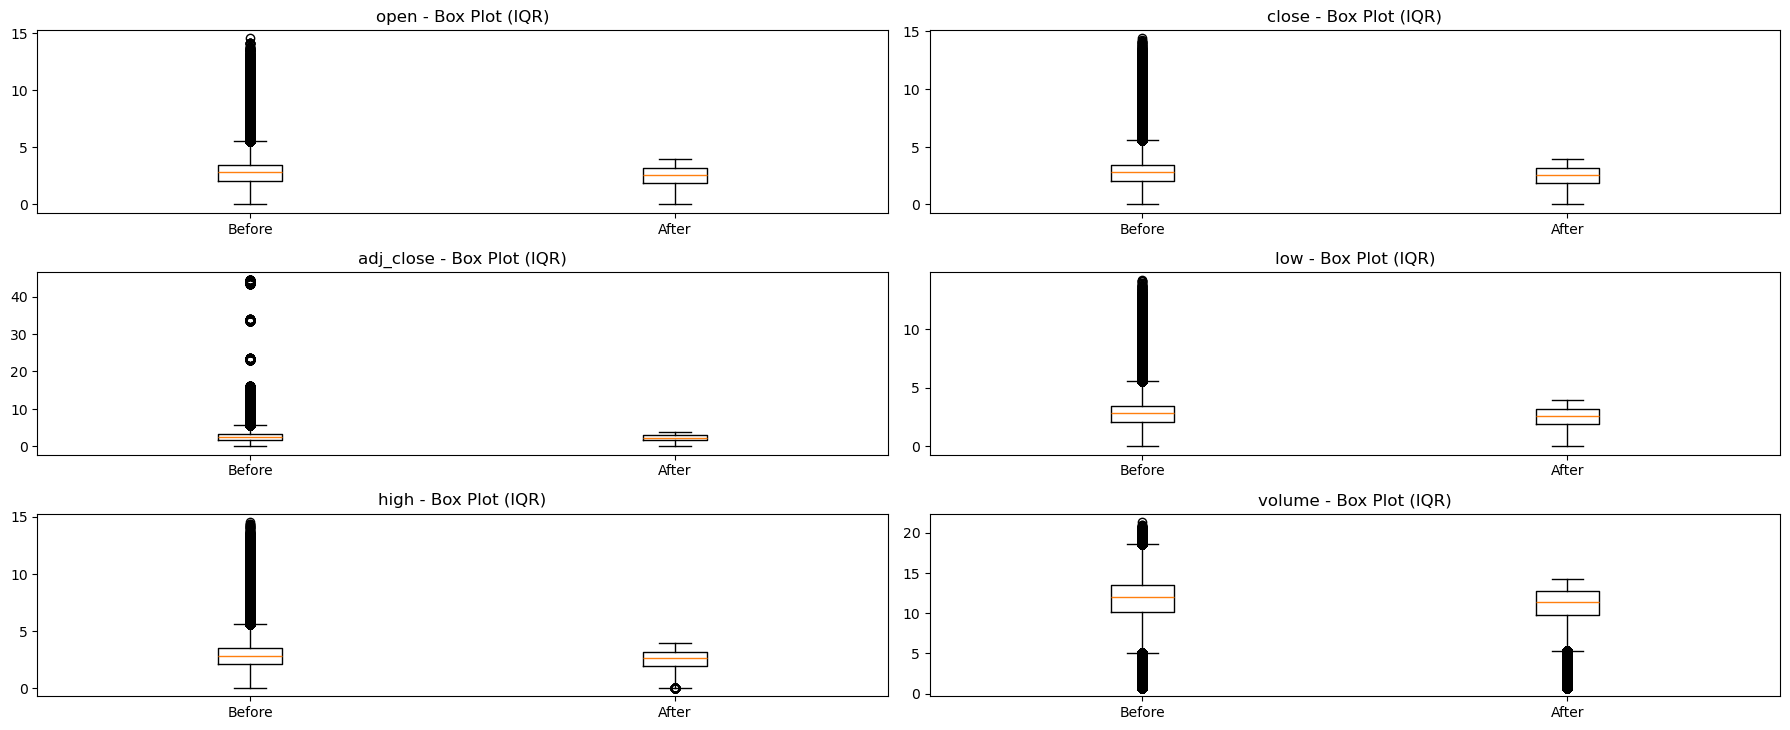

In [120]:
# Before and After Removing Outliers - Box Plots
plt.figure(figsize=(18, 12))
for i, x in enumerate(df_no_outliers.select_dtypes(include='number').columns):
    plt.subplot(5, 2, i+1)
    plt.boxplot([np.log1p(df[x]), np.log1p(df_no_outliers[x])], labels=['Before', 'After'])
    plt.title(f'{x} - Box Plot (IQR)')
    plt.ylabel('')
    plt.tight_layout()
plt.show()

In [131]:
# Handle Outliers - Capping
df_capped = df.copy()

# Check outliers across the df
for i in df_capped.select_dtypes(include='number').columns:
    lower = df_capped[i].quantile(0.1)
    upper = df_capped[i].quantile(0.9)
    df_capped[i] = df_capped[i].clip(lower, upper)

# Final shape before and after 
print(f'\nOriginal DF shape: {df.shape}')
print(f'Revised DF shape: {df_capped.shape}')
print(f'Total removed rows: {df.shape[0] - df_capped.shape[0]}')


Original DF shape: (18424440, 11)
Revised DF shape: (18424440, 11)
Total removed rows: 0


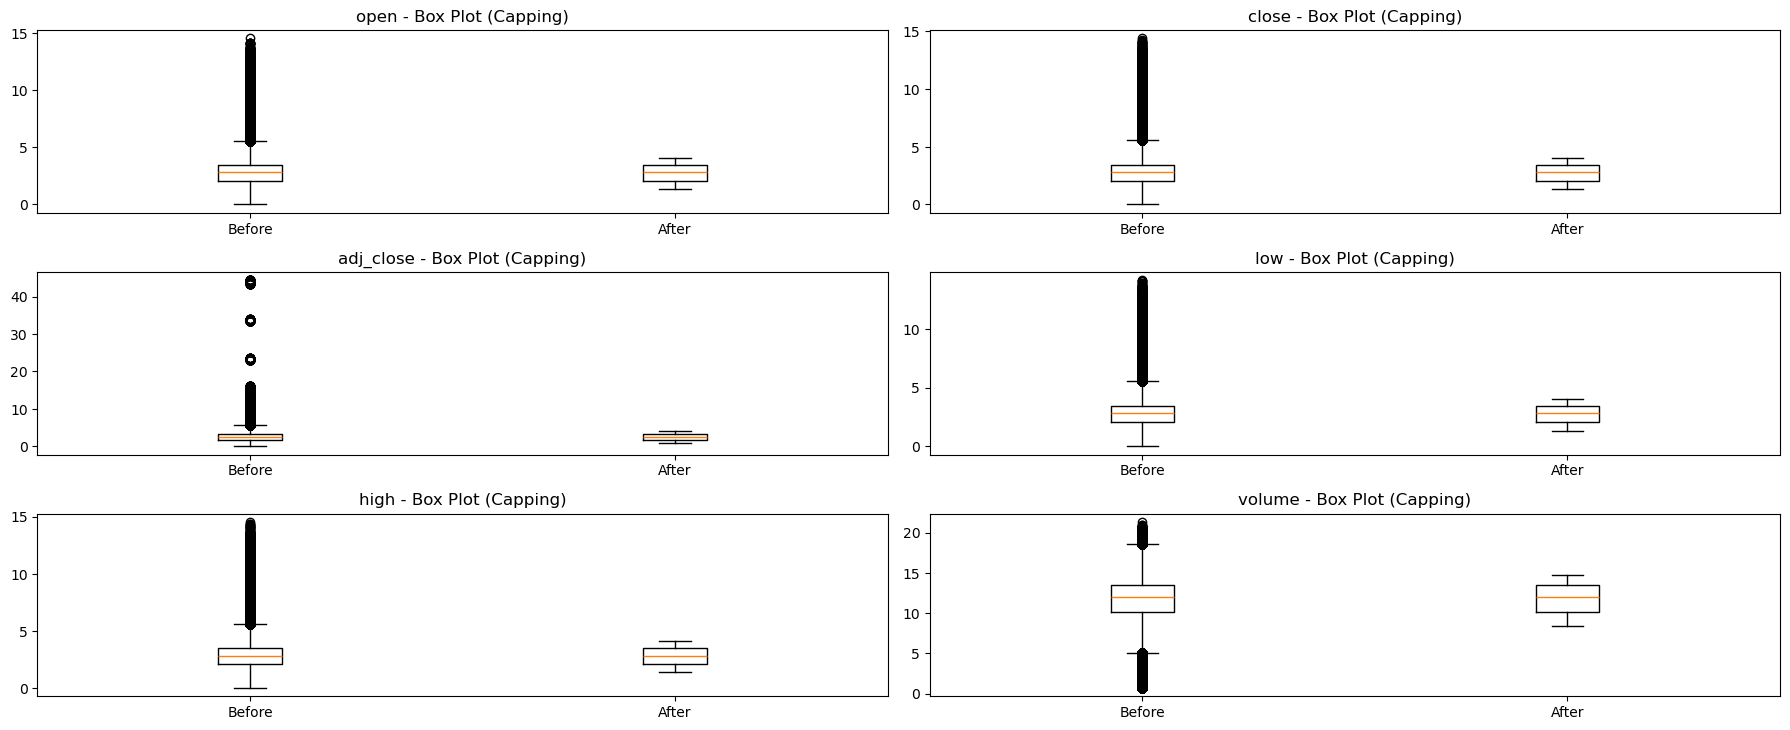

In [122]:
# Before and After Capping Outliers - Box Plots
plt.figure(figsize=(18, 12))
for i, x in enumerate(df_capped.select_dtypes(include='number').columns):   
    plt.subplot(5, 2, i+1)
    plt.boxplot([np.log1p(df[x]), np.log1p(df_capped[x])], labels=['Before', 'After'])
    plt.title(f'{x} - Box Plot (Capping)')
    plt.ylabel('')
    plt.tight_layout()
plt.show()

In [124]:
# Verify if there are any negative entries 
for i in df_capped.select_dtypes(include='number').columns:
    if i != 'decade':
        invalid = df_capped[df_capped[i] < 0]
        if invalid.empty:
            print(f'There are no Negative values in column: {i}')
        else:
            print(f'Negative values in column: {i}')
            print(invalid[[i]])

There are no Negative values in column: open
There are no Negative values in column: close
There are no Negative values in column: adj_close
There are no Negative values in column: low
There are no Negative values in column: high
There are no Negative values in column: volume


Data Transformation

In [125]:
# Feature Engineering
# 30-day rolling average for the 'close' price
df_capped['close_rolling_avg'] =df_capped['close'].rolling(window=30).mean().round(2)
# Volatility for the 'close' price
df_capped['close_volatility'] =df_capped['close'].rolling(window=30).std().round(2)

In [126]:
# Scaling 'volume'
scaler = StandardScaler()
df_capped['volume'] = scaler.fit_transform(df_capped[['volume']])

In [127]:
# Encoding 'sector'
df_capped = pd.get_dummies(df_capped, columns=['sector'], drop_first=True)

Integration and Formatting for Modeling

In [129]:
# Data split into train, validation & test
X_train_val, X_test, y_train_val, y_test = train_test_split(df_capped.drop('close', axis=1), df_capped['close'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 

Documentation and Reporting

* Data Cleaning: Removed nulls, corrected data types, dropped unnecessary columns.

* Outliers: Detected and handled outliers using both removal and capping techniques, then verified visually with box plots.

* Data Transformation: Created rolling averages and volatility, scaled volume and encoded sector.

* Splitting: Data was split into training, validation, and test sets.